# Business Queries with the INEGI database

In [1]:
import findspark # Activates Apache Spark, an engine for large-scale data processing.
findspark.init()
import shapely # manipulation and analysis of planar geometric objects
import pandas as pd
import geopandas as gpd # working with geospatial data
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark import SparkConf
from sedona.register import SedonaRegistrator # Sedona is a cluster computing system for processing large-scale spatial data
from sedona.utils import SedonaKryoRegistrator, KryoSerializer

In [2]:
# Details of the Spark session
spark = SparkSession. \
builder. \
appName('appName'). \
config("spark.serializer", KryoSerializer.getName). \
config("spark.executor.memory", "5g"). \
config("spark.driver.memory", "10g"). \
config('spark.driver.maxResultSize', '5g'). \
config("spark.kryo.registrator", SedonaKryoRegistrator.getName). \
config('spark.jars.packages',
           'org.apache.sedona:sedona-python-adapter-3.0_2.12:1.2.0-incubating,org.datasyslab:geotools-wrapper:1.1.0-25.2'). \
getOrCreate()
SedonaRegistrator.registerAll(spark)

True

#### We will only use the information and data from Nuevo León

In [3]:
# # Generate a readable database for Nuevo León's blocks
# # Just needs to be ran the first time

# import time

# start_time = time.time()

# path_scince = "../SCINCE 2020/"
# Estados_SCINCE = ['19_NL']

# for estado in Estados_SCINCE:
#     print(f"Procesando el estado: {estado}")
#     tabla_principal_poblacion = f"../SCINCE 2020/{estado}/cartografia/municipal.shp"

#     TPP = gpd.read_file(tabla_principal_poblacion)
#     Pandas_TPP = pd.DataFrame(TPP)
#     Spark_TPP = spark.createDataFrame(Pandas_TPP)

#     tablas_secundarias = ['caracteristicas_economicas','discapacidad','educacion','etnicidad','fecundidad','hogares_censales','migracion','mortalidad','religion','servicios_de_salud','situacion_conyugal','vivienda']

#     df = None
#     for tabla_sec in tablas_secundarias:
#         tabla_secundaria = f"../SCINCE 2020/{estado}/tablas/cpv2020_municipal_{tabla_sec}.dbf"
#         SEC = gpd.read_file(tabla_secundaria)
#         Pandas_SEC = pd.DataFrame(SEC).drop(['geometry'], axis=1)
#         Spark_SEC = spark.createDataFrame(Pandas_SEC)
#         if df is None:
#             df = Spark_TPP.join(Spark_SEC, on=['CVEGEO'], how='inner')
#         else:
#             df = df.join(Spark_SEC, on=['CVEGEO'], how='inner')
    
#     print(f"Guardando el estado: {estado}")
#     df.write.parquet(f"../DB_NL_Reto_v2/{estado}.parquet")
#     print(f"Concluido estado: {estado}")
    
# print("--- %s segundos ---" % (time.time() - start_time))

In [4]:
db_nl = spark.read.parquet(f"../DB_NL_Reto_v2/*.parquet")
db_nl.printSchema()

root
 |-- CVEGEO: string (nullable = true)
 |-- NOM_ENT: string (nullable = true)
 |-- NOMGEO: string (nullable = true)
 |-- POB1: double (nullable = true)
 |-- POB2: double (nullable = true)
 |-- POB2_R: double (nullable = true)
 |-- POB4: double (nullable = true)
 |-- POB4_R: double (nullable = true)
 |-- POB5: double (nullable = true)
 |-- POB5_R: double (nullable = true)
 |-- POB6: double (nullable = true)
 |-- POB6_R: double (nullable = true)
 |-- POB7: double (nullable = true)
 |-- POB7_R: double (nullable = true)
 |-- POB8: double (nullable = true)
 |-- POB8_R: double (nullable = true)
 |-- POB9: double (nullable = true)
 |-- POB9_R: double (nullable = true)
 |-- POB10: double (nullable = true)
 |-- POB10_R: double (nullable = true)
 |-- POB11: double (nullable = true)
 |-- POB11_R: double (nullable = true)
 |-- POB12: double (nullable = true)
 |-- POB12_R: double (nullable = true)
 |-- POB13: double (nullable = true)
 |-- POB13_R: double (nullable = true)
 |-- POB14: double (nu

In [5]:
# # Generate a readable database for Nuevo León's businesses
# # Just needs to be ran the first time

# start_time = time.time()

# HX = gpd.read_file("../Mex-Hex-5k/Mex-Hex-5k.shp")

# Estados_DENUE = ["19"]
# for estado in Estados_DENUE:
    
#     print(f"Procesando el estado: {estado}")
#     if estado in ["15_1","15_2"] :
#         tabla_denue = f"../DENUE_05_2022/denue_{estado}_shp/conjunto_de_datos/denue_inegi_{estado}.shp"
#     else:
#         tabla_denue = f"../DENUE_05_2022/denue_{estado}_shp/conjunto_de_datos/denue_inegi_{estado}_.shp"
    
#     TD = gpd.read_file(tabla_denue)
#     TD = TD.set_crs('epsg:4326', allow_override=True)
#     Spark_TD = spark.createDataFrame(TD.to_crs(HX.crs))
    
#     print(f"Guardando el estado: {estado}")
#     Spark_TD.write.parquet(f"../DB_NL_DENUE_Reto_v2/{estado}.parquet")
#     print(f"Concluido estado: {estado}")

# print("--- %s segundos ---" % (time.time() - start_time))

In [6]:
db_nl_denue = spark.read.parquet(f"../DB_NL_DENUE_Reto_v1/*.parquet")
db_nl_denue.printSchema()

root
 |-- id: long (nullable = true)
 |-- clee: string (nullable = true)
 |-- nom_estab: string (nullable = true)
 |-- raz_social: string (nullable = true)
 |-- codigo_act: string (nullable = true)
 |-- nombre_act: string (nullable = true)
 |-- per_ocu: string (nullable = true)
 |-- tipo_vial: string (nullable = true)
 |-- nom_vial: string (nullable = true)
 |-- tipo_v_e_1: string (nullable = true)
 |-- nom_v_e_1: string (nullable = true)
 |-- tipo_v_e_2: string (nullable = true)
 |-- nom_v_e_2: string (nullable = true)
 |-- tipo_v_e_3: string (nullable = true)
 |-- nom_v_e_3: string (nullable = true)
 |-- numero_ext: string (nullable = true)
 |-- letra_ext: string (nullable = true)
 |-- edificio: string (nullable = true)
 |-- edificio_e: string (nullable = true)
 |-- numero_int: string (nullable = true)
 |-- letra_int: string (nullable = true)
 |-- tipo_asent: string (nullable = true)
 |-- nomb_asent: string (nullable = true)
 |-- tipoCenCom: string (nullable = true)
 |-- nom_CenCom: 

In [7]:
#list of the SCINCE variables that will be used for analysis
var_viv = ["CVEGEO", "VIV0", "VIV1", "VIV7", "VIV8", "VIV9", "VIV10", "VIV14", "VIV16", "VIV25", "VIV26", "VIV27", "VIV28", "VIV29", "VIV31", "VIV32", "VIV33", "VIV34", "VIV38", "VIV39", "VIV40", "VIV41", "VIV42", "VIV81", "VIV37_R", "VIV13_R", "VIV80_R","VIV81_R", "VIV82_R","VIV83_R", "VIV84_R", "HOGAR1", "HOGAR4", "HOGAR7", "HOGAR13", "HOGAR16","HOGAR19", "HOGAR22"]
var_pob = ["POB11_R", "POB17_R", "POB42_R", "POB84_R", "MIG7_R","INDI1_R", "DISC1_R","EDU49_R","SCONY1_R", "SCONY4_R", "SCONY7_R", "RELIG1_R", "RELIG2_R","EDU25", "EDU28", "SALUD1", "SALUD2", "SALUD7", "SALUD8"]
var_ec = ["ECO1_R", "ECO28_R", "ECO34_R"]
#var_geom=["geometry"]

In [8]:
# building the demographic database (SCINCE)
db_nl_scince = db_nl.select(var_viv)
db_nl_scince = db_nl_scince.join(db_nl.select(var_pob))
db_nl_scince = db_nl_scince.join(db_nl.select(var_ec))
#db_nl_scince = db_nl_scince.join(db_nl.select(var_geom))

In [9]:
# Creates a temporary table that allows to run SQL queries
db_nl_scince.createOrReplaceTempView("db_nl_scince")
db_nl_scince.printSchema()

root
 |-- CVEGEO: string (nullable = true)
 |-- VIV0: double (nullable = true)
 |-- VIV1: double (nullable = true)
 |-- VIV7: double (nullable = true)
 |-- VIV8: double (nullable = true)
 |-- VIV9: double (nullable = true)
 |-- VIV10: double (nullable = true)
 |-- VIV14: double (nullable = true)
 |-- VIV16: double (nullable = true)
 |-- VIV25: double (nullable = true)
 |-- VIV26: double (nullable = true)
 |-- VIV27: double (nullable = true)
 |-- VIV28: double (nullable = true)
 |-- VIV29: double (nullable = true)
 |-- VIV31: double (nullable = true)
 |-- VIV32: double (nullable = true)
 |-- VIV33: double (nullable = true)
 |-- VIV34: double (nullable = true)
 |-- VIV38: double (nullable = true)
 |-- VIV39: double (nullable = true)
 |-- VIV40: double (nullable = true)
 |-- VIV41: double (nullable = true)
 |-- VIV42: double (nullable = true)
 |-- VIV81: double (nullable = true)
 |-- VIV37_R: double (nullable = true)
 |-- VIV13_R: double (nullable = true)
 |-- VIV80_R: double (nullable = 

In [10]:
# Select DENUE variables that will be used for analysis
var_denue=["codigo_act","nom_estab","cod_postal","cve_mun","municipio","latitud","longitud","manzana","geometry"]
db_nl_denue=db_nl_denue.select(var_denue)

In [11]:
db_nl_denue.createOrReplaceTempView("db_nl_denue")
db_nl_denue.printSchema()

root
 |-- codigo_act: string (nullable = true)
 |-- nom_estab: string (nullable = true)
 |-- cod_postal: string (nullable = true)
 |-- cve_mun: string (nullable = true)
 |-- municipio: string (nullable = true)
 |-- latitud: double (nullable = true)
 |-- longitud: double (nullable = true)
 |-- manzana: string (nullable = true)
 |-- geometry: geometry (nullable = true)



In [12]:
db_nl_scince.show(5)

+------+------+------+----+------+------+------+-----+-----+------+-----+------+------+------+-----+------+------+------+-----+-----+------+-----+-----+------+-------+-------+-------+-------+-------+-------+-------+------+-------+------+-------+-------+-------+-------+-------+-------+-------+-------+------+-------+-------+-------+--------+--------+--------+--------+--------+-------+-----+-------+------+------+------+------+-------+-------+
|CVEGEO|  VIV0|  VIV1|VIV7|  VIV8|  VIV9| VIV10|VIV14|VIV16| VIV25|VIV26| VIV27| VIV28| VIV29|VIV31| VIV32| VIV33| VIV34|VIV38|VIV39| VIV40|VIV41|VIV42| VIV81|VIV37_R|VIV13_R|VIV80_R|VIV81_R|VIV82_R|VIV83_R|VIV84_R|HOGAR1| HOGAR4|HOGAR7|HOGAR13|HOGAR16|HOGAR19|HOGAR22|POB11_R|POB17_R|POB42_R|POB84_R|MIG7_R|INDI1_R|DISC1_R|EDU49_R|SCONY1_R|SCONY4_R|SCONY7_R|RELIG1_R|RELIG2_R|  EDU25|EDU28| SALUD1|SALUD2|SALUD7|SALUD8|ECO1_R|ECO28_R|ECO34_R|
+------+------+------+----+------+------+------+-----+-----+------+-----+------+------+------+-----+------+-----

In [13]:
db_nl_scince.count()

132651

In [14]:
db_nl_denue.show(5)

+----------+--------------------+----------+-------+--------------------+-----------+-------------+-------+--------------------+
|codigo_act|           nom_estab|cod_postal|cve_mun|           municipio|    latitud|     longitud|manzana|            geometry|
+----------+--------------------+----------+-------+--------------------+-----------+-------------+-------+--------------------+
|    236221|      OFFICE CONCEPT|     66278|    039|           Monterrey| 25.6378307| -100.3172524|    026|POINT (2668173.42...|
|    237121|             OFICINA|     64000|    039|           Monterrey|25.68124975|-100.32135603|    001|POINT (2667707.29...|
|    236221|             ODEVISA|     64460|    039|           Monterrey|25.70120271|-100.34094675|    007|POINT (2665724.69...|
|    236111|    ODICSA, SA DE CV|     64750|    019|San Pedro Garza G...|25.65107342|-100.37352233|    044|POINT (2662533.50...|
|    236111|OFICINA ADMINISTR...|     66196|    048|      Santa Catarina|25.65742631|-100.4390073

In [15]:
db_nl_scince.select("CVEGEO").distinct().collect()

[Row(CVEGEO='19051'),
 Row(CVEGEO='19005'),
 Row(CVEGEO='19041'),
 Row(CVEGEO='19002'),
 Row(CVEGEO='19022'),
 Row(CVEGEO='19045'),
 Row(CVEGEO='19050'),
 Row(CVEGEO='19044'),
 Row(CVEGEO='19015'),
 Row(CVEGEO='19027'),
 Row(CVEGEO='19030'),
 Row(CVEGEO='19001'),
 Row(CVEGEO='19020'),
 Row(CVEGEO='19040'),
 Row(CVEGEO='19018'),
 Row(CVEGEO='19047'),
 Row(CVEGEO='19042'),
 Row(CVEGEO='19014'),
 Row(CVEGEO='19036'),
 Row(CVEGEO='19016'),
 Row(CVEGEO='19049'),
 Row(CVEGEO='19048'),
 Row(CVEGEO='19010'),
 Row(CVEGEO='19017'),
 Row(CVEGEO='19004'),
 Row(CVEGEO='19038'),
 Row(CVEGEO='19006'),
 Row(CVEGEO='19008'),
 Row(CVEGEO='19003'),
 Row(CVEGEO='19029'),
 Row(CVEGEO='19024'),
 Row(CVEGEO='19031'),
 Row(CVEGEO='19033'),
 Row(CVEGEO='19025'),
 Row(CVEGEO='19026'),
 Row(CVEGEO='19037'),
 Row(CVEGEO='19019'),
 Row(CVEGEO='19009'),
 Row(CVEGEO='19011'),
 Row(CVEGEO='19032'),
 Row(CVEGEO='19013'),
 Row(CVEGEO='19046'),
 Row(CVEGEO='19034'),
 Row(CVEGEO='19028'),
 Row(CVEGEO='19035'),
 Row(CVEGE

In [16]:
db_nl_denue.select("cve_mun").distinct().collect()

[Row(cve_mun='030'),
 Row(cve_mun='009'),
 Row(cve_mun='032'),
 Row(cve_mun='048'),
 Row(cve_mun='028'),
 Row(cve_mun='012'),
 Row(cve_mun='027'),
 Row(cve_mun='037'),
 Row(cve_mun='013'),
 Row(cve_mun='024'),
 Row(cve_mun='031'),
 Row(cve_mun='034'),
 Row(cve_mun='015'),
 Row(cve_mun='006'),
 Row(cve_mun='019'),
 Row(cve_mun='046'),
 Row(cve_mun='020'),
 Row(cve_mun='033'),
 Row(cve_mun='047'),
 Row(cve_mun='040'),
 Row(cve_mun='011'),
 Row(cve_mun='025'),
 Row(cve_mun='042'),
 Row(cve_mun='044'),
 Row(cve_mun='051'),
 Row(cve_mun='045'),
 Row(cve_mun='005'),
 Row(cve_mun='003'),
 Row(cve_mun='038'),
 Row(cve_mun='035'),
 Row(cve_mun='049'),
 Row(cve_mun='016'),
 Row(cve_mun='018'),
 Row(cve_mun='029'),
 Row(cve_mun='008'),
 Row(cve_mun='022'),
 Row(cve_mun='001'),
 Row(cve_mun='014'),
 Row(cve_mun='010'),
 Row(cve_mun='039'),
 Row(cve_mun='023'),
 Row(cve_mun='036'),
 Row(cve_mun='004'),
 Row(cve_mun='050'),
 Row(cve_mun='041'),
 Row(cve_mun='017'),
 Row(cve_mun='026'),
 Row(cve_mun=

In [17]:
# path_ZIP = "../CodigosPostales/"

# print(f"Procesando los códigos postales:")
# tabla_principal_zips = f"../CodigosPostales/CodigosPostales_4326.shp"

# TPZ = gpd.read_file(tabla_principal_zips)
# Pandas_TPZ = pd.DataFrame(TPZ)
# Spark_TPZ = spark.createDataFrame(Pandas_TPZ)
# df = Spark_TPZ

# print(f"Guardando los códigos:")
# df.write.parquet(f"../DB_CodigosPostales/zips.parquet")
# print(f"Concluido")
    
# print("--- %s segundos ---" % (time.time() - start_time))

In [18]:
db_zips = spark.read.parquet(f"../DB_CodigosPostales/*.parquet")
db_zips.printSchema()

root
 |-- d_cp: string (nullable = true)
 |-- geometry: geometry (nullable = true)



In [19]:
db_zips.show(10)
db_zips.createOrReplaceTempView("db_zips")

+-----+--------------------+
| d_cp|            geometry|
+-----+--------------------+
|69015|POLYGON ((-97.617...|
|69018|POLYGON ((-97.770...|
|69014|POLYGON ((-97.760...|
|69012|POLYGON ((-97.827...|
|69020|POLYGON ((-97.766...|
|69021|POLYGON ((-97.769...|
|69023|POLYGON ((-97.786...|
|69022|POLYGON ((-97.788...|
|69017|POLYGON ((-97.696...|
|69013|POLYGON ((-97.682...|
+-----+--------------------+
only showing top 10 rows



In [20]:
db_zips.count()

36089

In [21]:
cp_nl = spark.sql("""SELECT *
                            FROM db_zips
                            WHERE db_zips.d_cp = "64800"
                            """)
cp_nl.show(truncate=False)

+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [22]:
from pyspark.sql.functions import desc
db_nl_scince_zip=db_nl_scince.join(db_zips, on=["geometry"], how= "left")
db_nl_scince_zip.show()

AnalysisException: USING column `geometry` cannot be resolved on the left side of the join. The left-side columns: [CVEGEO, VIV0, VIV1, VIV7, VIV8, VIV9, VIV10, VIV14, VIV16, VIV25, VIV26, VIV27, VIV28, VIV29, VIV31, VIV32, VIV33, VIV34, VIV38, VIV39, VIV40, VIV41, VIV42, VIV81, VIV37_R, VIV13_R, VIV80_R, VIV81_R, VIV82_R, VIV83_R, VIV84_R, HOGAR1, HOGAR4, HOGAR7, HOGAR13, HOGAR16, HOGAR19, HOGAR22, POB11_R, POB17_R, POB42_R, POB84_R, MIG7_R, INDI1_R, DISC1_R, EDU49_R, SCONY1_R, SCONY4_R, SCONY7_R, RELIG1_R, RELIG2_R, EDU25, EDU28, SALUD1, SALUD2, SALUD7, SALUD8, ECO1_R, ECO28_R, ECO34_R]

In [ ]:
db_nl_scince_zip.show(truncate=False)

In [ ]:
db_nl_scince.join(db_zips, on=["geometry"], how= "inner").show()

### We generate new variables from the DENUE database.

In [23]:
df_denue=db_nl_denue.toPandas()

In [24]:
df_scince=db_nl_scince.toPandas()

#db_nl_scince.write.csv("df_scince_prueba")


In [25]:
df_scince.head()

,CVEGEO,VIV0,VIV1,VIV7,VIV8,VIV9,VIV10,VIV14,VIV16,VIV25,...,RELIG2_R,EDU25,EDU28,SALUD1,SALUD2,SALUD7,SALUD8,ECO1_R,ECO28_R,ECO34_R
0,19005,8119.0,5468.0,69.0,1941.0,3513.0,1434.0,178.0,96.0,5146.0,...,15.0,12579.0,476.0,15386.0,2626.0,196.0,130.0,55.6,44.1,28.7
1,19005,8119.0,5468.0,69.0,1941.0,3513.0,1434.0,178.0,96.0,5146.0,...,15.0,12579.0,476.0,15386.0,2626.0,196.0,130.0,46.0,53.8,18.6
2,19005,8119.0,5468.0,69.0,1941.0,3513.0,1434.0,178.0,96.0,5146.0,...,15.0,12579.0,476.0,15386.0,2626.0,196.0,130.0,48.6,51.1,30.0
3,19005,8119.0,5468.0,69.0,1941.0,3513.0,1434.0,178.0,96.0,5146.0,...,15.0,12579.0,476.0,15386.0,2626.0,196.0,130.0,60.1,39.5,26.2
4,19005,8119.0,5468.0,69.0,1941.0,3513.0,1434.0,178.0,96.0,5146.0,...,15.0,12579.0,476.0,15386.0,2626.0,196.0,130.0,64.4,34.9,41.9


In [26]:
df_scince["CVEGEO_clean"]=pd.to_numeric(df_scince["CVEGEO"])-19000

In [27]:
var_abs = ["CVEGEO_clean", "VIV0", "VIV1", "VIV7", "VIV8", "VIV9", "VIV10", "VIV14", "VIV16", "VIV25", "VIV26", "VIV27", "VIV28", "VIV29", "VIV31", "VIV32", "VIV33", "VIV34", "VIV38", "VIV39", "VIV40", "VIV41", "VIV42", "VIV81", "HOGAR1", "HOGAR4", "HOGAR7", "HOGAR13", "HOGAR16","HOGAR19", "HOGAR22", "EDU25", "EDU28", "SALUD1", "SALUD2", "SALUD7", "SALUD8"]
var_rel = ["CVEGEO_clean", "VIV37_R", "VIV13_R", "VIV80_R","VIV81_R", "VIV82_R","VIV83_R", "VIV84_R", "POB11_R", "POB17_R", "POB42_R", "POB84_R", "MIG7_R","INDI1_R", "DISC1_R","EDU49_R","SCONY1_R", "SCONY4_R", "SCONY7_R", "RELIG1_R", "RELIG2_R", "ECO1_R", "ECO28_R", "ECO34_R"]

In [28]:
df_scince_abs=df_scince[var_abs]
#df_scince_rel=df_scince[var_rel]

In [29]:
df_scince_abs=df_scince_abs.groupby("CVEGEO_clean").sum()

In [30]:
#df_scince_rel=df_scince_rel.groupby("CVEGEO_clean").mean()

In [31]:
#pd.concat([df_scince_abs,df_scince_rel],axis=1)

In [32]:
#pd.concat([df_scince_abs,df_scince_rel],axis=1)
df_scince_clean=df_scince_abs
df_scince_clean.head()

,VIV0,VIV1,VIV7,VIV8,VIV9,VIV10,VIV14,VIV16,VIV25,VIV26,...,HOGAR13,HOGAR16,HOGAR19,HOGAR22,EDU25,EDU28,SALUD1,SALUD2,SALUD7,SALUD8
CVEGEO_clean,,,,,,,,,,,,,,,,,,,,,
1,3105594.0,2086002.0,15606.0,720477.0,1357722.0,637245.0,72828.0,7803.0,2018376.0,2601.0,...,1292697.0,5165586.0,577422.0,1807695.0,219363903.0,3262980.0,238754715.0,54705864.0,16836630.0,4432410.0
2,7727571.0,3316275.0,2601.0,1227672.0,2075598.0,514998.0,85833.0,28611.0,3191427.0,2601.0,...,1584009.0,5004324.0,1516383.0,3134205.0,219363903.0,3262980.0,238754715.0,54705864.0,16836630.0,4432410.0
3,4221423.0,1407141.0,0.0,567018.0,837522.0,202878.0,10404.0,5202.0,1365525.0,5202.0,...,655452.0,2023578.0,655452.0,1344717.0,219363903.0,3262980.0,238754715.0,54705864.0,16836630.0,4432410.0
4,35854785.0,27851508.0,140454.0,8840799.0,18945684.0,6260607.0,522801.0,18207.0,27435348.0,2601.0,...,16935111.0,62936397.0,7935651.0,18904068.0,219363903.0,3262980.0,238754715.0,54705864.0,16836630.0,4432410.0
5,21117519.0,14222268.0,179469.0,5048541.0,9137313.0,3729834.0,462978.0,249696.0,13384746.0,98838.0,...,8310195.0,30941496.0,4523139.0,11207709.0,219363903.0,3262980.0,238754715.0,54705864.0,16836630.0,4432410.0


In [33]:
df_scince_clean.describe()

,VIV0,VIV1,VIV7,VIV8,VIV9,VIV10,VIV14,VIV16,VIV25,VIV26,...,HOGAR13,HOGAR16,HOGAR19,HOGAR22,EDU25,EDU28,SALUD1,SALUD2,SALUD7,SALUD8
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,51.000000,...,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.0,51.0,51.0,51.0,51.0,51.0
mean,1.039224e+08,8.444019e+07,7.108890e+05,2.030606e+07,6.376489e+07,1.734597e+07,1.112871e+06,145299.000000,8.288398e+07,37230.000000,...,5.371167e+07,1.987905e+08,2.032697e+07,6.290712e+07,219363903.0,3262980.0,238754715.0,54705864.0,16836630.0,4432410.0
std,1.903549e+08,1.647698e+08,1.222103e+06,3.739905e+07,1.269531e+08,3.063926e+07,2.146720e+06,151870.801602,1.634828e+08,55565.274942,...,1.033589e+08,3.841008e+08,5.167020e+07,1.660751e+08,0.0,0.0,0.0,0.0,0.0,0.0
min,2.158830e+06,8.687340e+05,0.000000e+00,2.366910e+05,6.294420e+05,1.352520e+05,1.040400e+04,0.000000,8.401230e+05,0.000000,...,3.667410e+05,1.201662e+06,4.161600e+05,9.519660e+05,219363903.0,3262980.0,238754715.0,54705864.0,16836630.0,4432410.0
25%,5.987502e+06,3.184924e+06,2.210850e+04,1.178253e+06,1.832404e+06,7.048710e+05,9.103500e+04,26010.000000,2.697237e+06,5202.000000,...,1.608718e+06,5.505016e+06,1.113228e+06,2.910519e+06,219363903.0,3262980.0,238754715.0,54705864.0,16836630.0,4432410.0
50%,1.534590e+07,1.112188e+07,1.404540e+05,3.633597e+06,6.648156e+06,2.814282e+06,2.991150e+05,88434.000000,8.900622e+06,18207.000000,...,5.940684e+06,2.197065e+07,3.625794e+06,1.019332e+07,219363903.0,3262980.0,238754715.0,54705864.0,16836630.0,4432410.0
75%,9.747898e+07,7.160813e+07,9.883800e+05,1.936835e+07,5.142957e+07,1.768940e+07,1.258884e+06,237991.500000,7.085774e+07,41616.000000,...,4.587384e+07,1.702133e+08,1.154584e+07,3.139667e+07,219363903.0,3262980.0,238754715.0,54705864.0,16836630.0,4432410.0
max,9.592384e+08,8.559761e+08,6.796413e+06,2.046727e+08,6.432793e+08,1.323779e+08,1.337954e+07,624240.000000,8.440791e+08,239292.000000,...,4.761963e+08,1.771528e+09,3.083850e+08,9.846814e+08,219363903.0,3262980.0,238754715.0,54705864.0,16836630.0,4432410.0


In [34]:
df_scince_clean=df_scince_clean.drop(["EDU25","EDU28","SALUD1","SALUD2","SALUD7","SALUD8"],axis=1)
df_scince_clean.head()

,VIV0,VIV1,VIV7,VIV8,VIV9,VIV10,VIV14,VIV16,VIV25,VIV26,...,VIV41,VIV42,VIV81,HOGAR1,HOGAR4,HOGAR7,HOGAR13,HOGAR16,HOGAR19,HOGAR22
CVEGEO_clean,,,,,,,,,,,,,,,,,,,,,
1,3105594.0,2086002.0,15606.0,720477.0,1357722.0,637245.0,72828.0,7803.0,2018376.0,2601.0,...,23409.0,10404.0,249696.0,2086002.0,7735374.0,213282.0,1292697.0,5165586.0,577422.0,1807695.0
2,7727571.0,3316275.0,2601.0,1227672.0,2075598.0,514998.0,85833.0,28611.0,3191427.0,2601.0,...,41616.0,15606.0,619038.0,3313674.0,8780976.0,213282.0,1584009.0,5004324.0,1516383.0,3134205.0
3,4221423.0,1407141.0,0.0,567018.0,837522.0,202878.0,10404.0,5202.0,1365525.0,5202.0,...,18207.0,2601.0,288711.0,1407141.0,3659607.0,96237.0,655452.0,2023578.0,655452.0,1344717.0
4,35854785.0,27851508.0,140454.0,8840799.0,18945684.0,6260607.0,522801.0,18207.0,27435348.0,2601.0,...,239292.0,80631.0,4031550.0,27838503.0,91282095.0,2954736.0,16935111.0,62936397.0,7935651.0,18904068.0
5,21117519.0,14222268.0,179469.0,5048541.0,9137313.0,3729834.0,462978.0,249696.0,13384746.0,98838.0,...,140454.0,67626.0,3646602.0,14222268.0,46896030.0,1388934.0,8310195.0,30941496.0,4523139.0,11207709.0


In [35]:
df_denue.columns

Index(['codigo_act', 'nom_estab', 'cod_postal', 'cve_mun', 'municipio',
       'latitud', 'longitud', 'manzana', 'geometry'],
      dtype='object')

In [36]:
var_denue=["codigo_act","cve_mun"]#,"cod_postal"]

In [37]:
df_denue_clean=df_denue[var_denue]

In [38]:
#negocios = {"NEGOCIO_TIENDITA": "461110", "NEGOCIO_ROPA": "463211", "NEGOCIO_TECNOLOGIA": "466211", "NEGOCIO_RESTAURANTE": "722", "NEGOCIO_PAPELERIA":"465311", "NEGOCIO_GIMNASIO": "713943", "NEGOCIO_ESTETICA": "812110"} 
#codigos_negocios = ("461110", "463211", "466211", "722511", "722512", "722513", "722514", "722515", "465311", "713943", "812110")

In [39]:
df_denue_clean["tiendita"]='a'
df_denue_clean["ropa"]='b'
df_denue_clean["tecnologia"]='c'
df_denue_clean["restaurante"]='d'
df_denue_clean["papeleria"]='e'
df_denue_clean["gimnasio"]='f'
df_denue_clean["estetica"]='g'

df_denue_clean["tiendita"]=0
df_denue_clean["ropa"]=0
df_denue_clean["tecnologia"]=0
df_denue_clean["restaurante"]=0
df_denue_clean["papeleria"]=0
df_denue_clean["gimnasio"]=0
df_denue_clean["estetica"]=0
df_denue_clean.head()

C:\Users\alexd\AppData\Local\Temp\ipykernel_3040\1454253610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_denue_clean["tiendita"]='a'
C:\Users\alexd\AppData\Local\Temp\ipykernel_3040\1454253610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_denue_clean["ropa"]='b'
C:\Users\alexd\AppData\Local\Temp\ipykernel_3040\1454253610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,codigo_act,cve_mun,tiendita,ropa,tecnologia,restaurante,papeleria,gimnasio,estetica
0,236221,039,0,0,0,0,0,0,0
1,237121,039,0,0,0,0,0,0,0
2,236221,039,0,0,0,0,0,0,0
3,236111,019,0,0,0,0,0,0,0
4,236111,048,0,0,0,0,0,0,0


In [40]:
df_denue_clean.dtypes

codigo_act     object
cve_mun        object
tiendita        int64
ropa            int64
tecnologia      int64
restaurante     int64
papeleria       int64
gimnasio        int64
estetica        int64
dtype: object

In [41]:
df_denue_clean["cve_mun"]=pd.to_numeric(df_denue_clean["cve_mun"])

In [42]:
df_denue_clean.loc[df_denue_clean.codigo_act=="461110","tiendita"]=1
df_denue_clean.loc[df_denue_clean.codigo_act=="463211","ropa"]=1
df_denue_clean.loc[df_denue_clean.codigo_act=="466211","tecnologia"]=1
df_denue_clean.loc[df_denue_clean.codigo_act=="465311","papeleria"]=1
df_denue_clean.loc[df_denue_clean.codigo_act=="713943","gimnasio"]=1
df_denue_clean.loc[df_denue_clean.codigo_act=="812110","estetica"]=1
df_denue_clean.loc[df_denue_clean.codigo_act=="722513","restaurante"]=1

In [43]:
df_denue_clean

,codigo_act,cve_mun,tiendita,ropa,tecnologia,restaurante,papeleria,gimnasio,estetica
0,236221,39,0,0,0,0,0,0,0
1,237121,39,0,0,0,0,0,0,0
2,236221,39,0,0,0,0,0,0,0
3,236111,19,0,0,0,0,0,0,0
4,236111,48,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
186087,812110,31,0,0,0,0,0,0,1
186088,812110,46,0,0,0,0,0,0,1
186089,812110,46,0,0,0,0,0,0,1
186090,812110,6,0,0,0,0,0,0,1


In [44]:
df_denue_clean=df_denue_clean.loc[(df_denue_clean.codigo_act=="461110")|(df_denue_clean.codigo_act=="463211")|(df_denue_clean.codigo_act=="466211")|(df_denue_clean.codigo_act=="722513")|(df_denue_clean.codigo_act=="465311")|(df_denue_clean.codigo_act=="713943")|(df_denue_clean.codigo_act=="812110")|(df_denue_clean.codigo_act=="722513")]
df_denue_clean.head()

,codigo_act,cve_mun,tiendita,ropa,tecnologia,restaurante,papeleria,gimnasio,estetica
20001,461110,18,1,0,0,0,0,0,0
20002,461110,21,1,0,0,0,0,0,0
20003,461110,39,1,0,0,0,0,0,0
20004,461110,39,1,0,0,0,0,0,0
20005,461110,46,1,0,0,0,0,0,0


In [45]:
df_denue_clean=df_denue_clean.groupby(["cve_mun"]).sum()
df_denue_clean.head()

C:\Users\alexd\AppData\Local\Temp\ipykernel_3040\3280286590.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_denue_clean=df_denue_clean.groupby(["cve_mun"]).sum()


,tiendita,ropa,tecnologia,restaurante,papeleria,gimnasio,estetica
cve_mun,,,,,,,
1,14,0,0,0,3,0,2
2,14,0,0,0,0,0,1
3,6,0,0,0,2,0,1
4,157,43,2,8,22,5,59
5,80,15,0,3,14,1,29


In [46]:
df_final=pd.concat([df_scince_clean,df_denue_clean],axis=1)
df_final

,VIV0,VIV1,VIV7,VIV8,VIV9,VIV10,VIV14,VIV16,VIV25,VIV26,...,HOGAR16,HOGAR19,HOGAR22,tiendita,ropa,tecnologia,restaurante,papeleria,gimnasio,estetica
1,3105594.0,2086002.0,15606.0,720477.0,1357722.0,637245.0,72828.0,7803.0,2018376.0,2601.0,...,5.165586e+06,577422.0,1807695.0,14,0,0,0,3,0,2
2,7727571.0,3316275.0,2601.0,1227672.0,2075598.0,514998.0,85833.0,28611.0,3191427.0,2601.0,...,5.004324e+06,1516383.0,3134205.0,14,0,0,0,0,0,1
3,4221423.0,1407141.0,0.0,567018.0,837522.0,202878.0,10404.0,5202.0,1365525.0,5202.0,...,2.023578e+06,655452.0,1344717.0,6,0,0,0,2,0,1
4,35854785.0,27851508.0,140454.0,8840799.0,18945684.0,6260607.0,522801.0,18207.0,27435348.0,2601.0,...,6.293640e+07,7935651.0,18904068.0,157,43,2,8,22,5,59
5,21117519.0,14222268.0,179469.0,5048541.0,9137313.0,3729834.0,462978.0,249696.0,13384746.0,98838.0,...,3.094150e+07,4523139.0,11207709.0,80,15,0,3,14,1,29
6,553495401.0,472674528.0,1672443.0,87630291.0,384615072.0,94299255.0,2902716.0,132651.0,471649734.0,18207.0,...,1.353329e+09,61641099.0,195730452.0,1221,169,6,264,446,92,992
7,15983145.0,11121876.0,1217268.0,4434705.0,6648156.0,3550365.0,512397.0,299115.0,8900622.0,59823.0,...,2.391620e+07,4452912.0,12534219.0,71,9,1,6,9,1,13
8,6213789.0,3074382.0,18207.0,1131435.0,1844109.0,694467.0,91035.0,31212.0,2876706.0,23409.0,...,5.828841e+06,1173051.0,2822085.0,36,4,0,0,4,0,5
9,143655831.0,97188966.0,496791.0,32444874.0,64562022.0,23382990.0,1602216.0,176868.0,95383872.0,23409.0,...,2.158804e+08,19835226.0,50542632.0,406,76,3,63,69,18,195
10,100866780.0,78144444.0,533205.0,22295772.0,55684809.0,25325937.0,1180854.0,226287.0,77163867.0,10404.0,...,1.858154e+08,4127787.0,10924200.0,83,5,0,7,12,0,21


# Machine Learning Modelling

In [47]:
import matplotlib.pyplot as plt
import numpy as np
#%pip install seaborn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [48]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [49]:
df_final.describe()

,VIV0,VIV1,VIV7,VIV8,VIV9,VIV10,VIV14,VIV16,VIV25,VIV26,...,HOGAR16,HOGAR19,HOGAR22,tiendita,ropa,tecnologia,restaurante,papeleria,gimnasio,estetica
count,51.000,51.000,51.000,51.000,51.000,51.000,51.000,51.000,51.000,51.000,...,51.000,51.000,51.000,51.000,51.000,51.000,51.000,51.000,51.000,51.000
mean,103922445.000,84440190.000,710889.000,20306058.000,63764892.000,17345967.000,1112871.000,145299.000,82883976.000,37230.000,...,198790452.000,20326968.000,62907123.000,311.863,57.510,4.588,43.980,71.490,18.843,203.353
std,190354881.383,164769840.286,1222102.981,37399049.365,126953117.761,30639258.974,2146719.685,151870.802,163482806.504,55565.275,...,384100822.703,51670199.846,166075063.385,638.801,168.367,19.067,111.264,153.153,48.410,493.411
min,2158830.000,868734.000,0.000,236691.000,629442.000,135252.000,10404.000,0.000,840123.000,0.000,...,1201662.000,416160.000,951966.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5987502.000,3184924.500,22108.500,1178253.000,1832404.500,704871.000,91035.000,26010.000,2697237.000,5202.000,...,5505016.500,1113228.000,2910519.000,20.000,1.000,0.000,0.000,1.000,0.000,2.000
50%,15345900.000,11121876.000,140454.000,3633597.000,6648156.000,2814282.000,299115.000,88434.000,8900622.000,18207.000,...,21970647.000,3625794.000,10193319.000,55.000,9.000,0.000,3.000,6.000,1.000,18.000
75%,97478977.500,71608131.000,988380.000,19368346.500,51429573.000,17689401.000,1258884.000,237991.500,70857742.500,41616.000,...,170213341.500,11545839.000,31396671.000,191.500,41.000,2.000,16.500,38.000,6.000,86.500
max,959238396.000,855976095.000,6796413.000,204672690.000,643279320.000,132377895.000,13379544.000,624240.000,844079121.000,239292.000,...,1771528095.000,308384964.000,984681378.000,3604.000,1146.000,133.000,639.000,738.000,271.000,2830.000


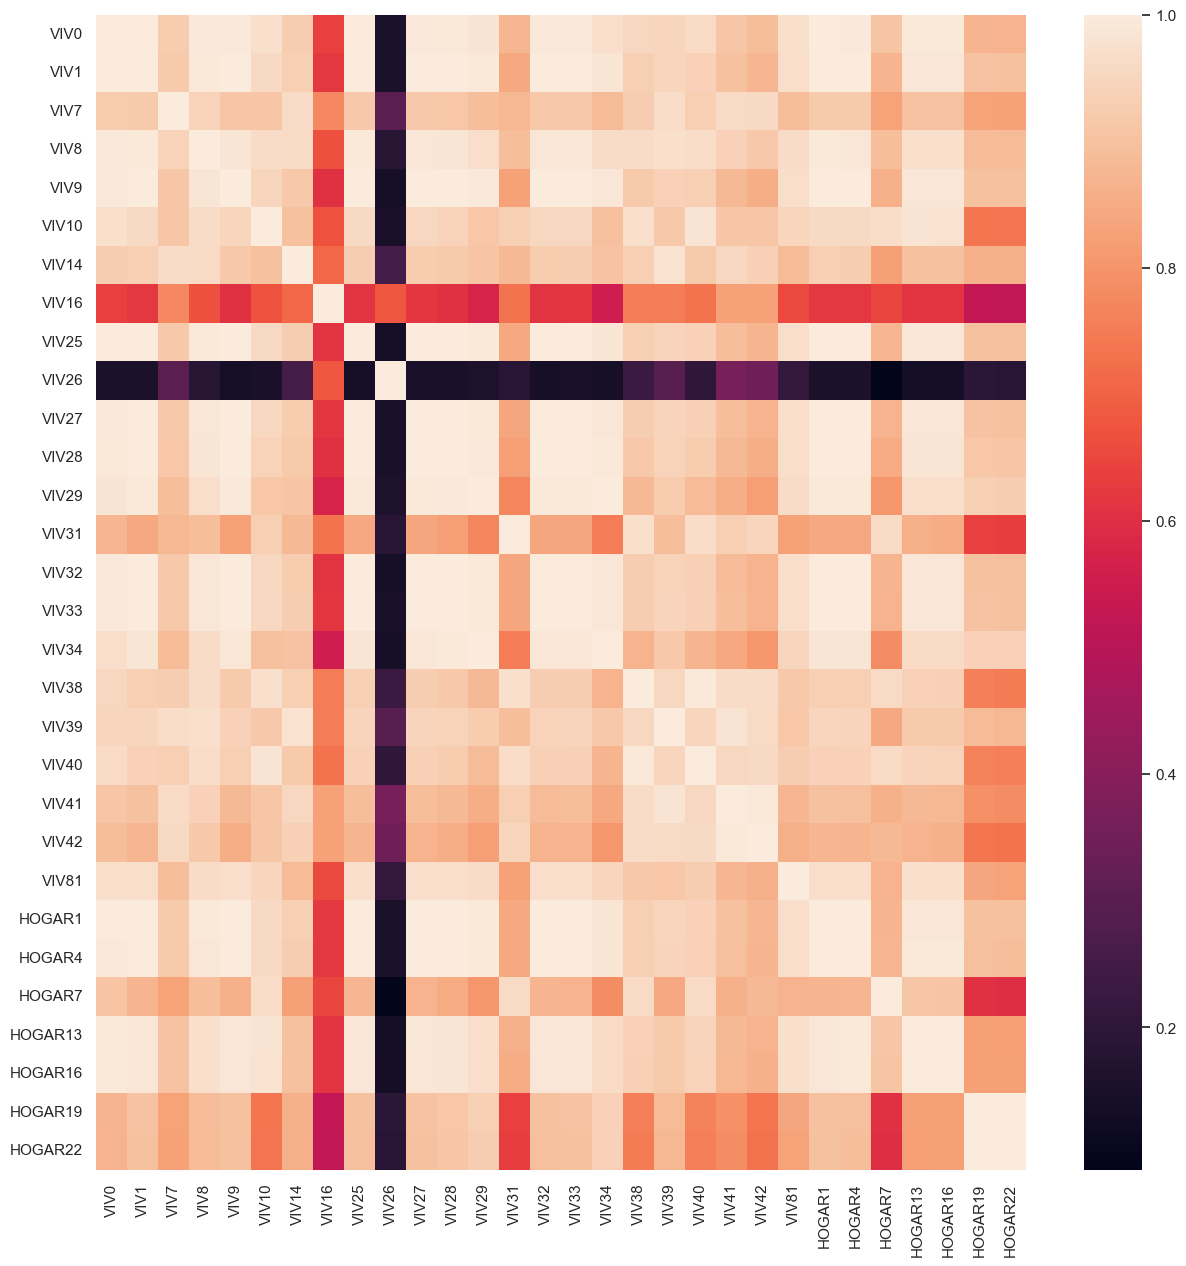

In [86]:
sns.heatmap(df_scince_clean.corr(),annot=False)
sns.set(rc={"figure.figsize":(15, 15)}) #width=8, height=4

In [51]:
X_full=df_scince_clean

In [52]:
scaler=StandardScaler()
scaler.fit(X_full)
X_scaled=scaler.transform(X_full)

Text(0, 0.5, 'cumulative explained variance')

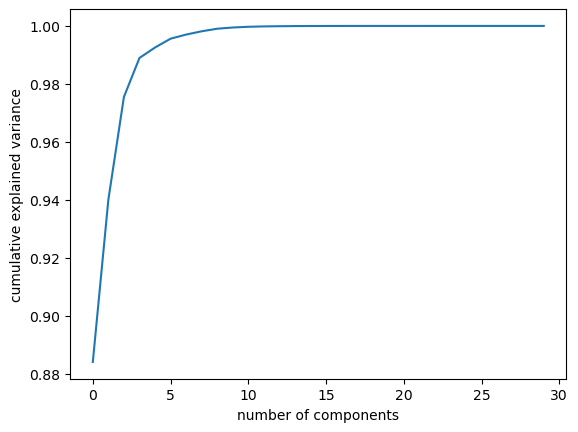

In [53]:
pca=PCA()
pca.fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [54]:
np.cumsum(pca.explained_variance_ratio_)

array([0.8842023 , 0.94013751, 0.97552921, 0.98896273, 0.99256255,
       0.99560121, 0.99701833, 0.99814967, 0.99903804, 0.99945328,
       0.9997019 , 0.99982982, 0.99989811, 0.999944  , 0.9999702 ,
       0.99998662, 0.99999215, 0.99999595, 0.9999981 , 0.99999891,
       0.99999946, 0.99999981, 0.9999999 , 0.99999997, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

Text(0, 0.5, 'cumulative explained variance')

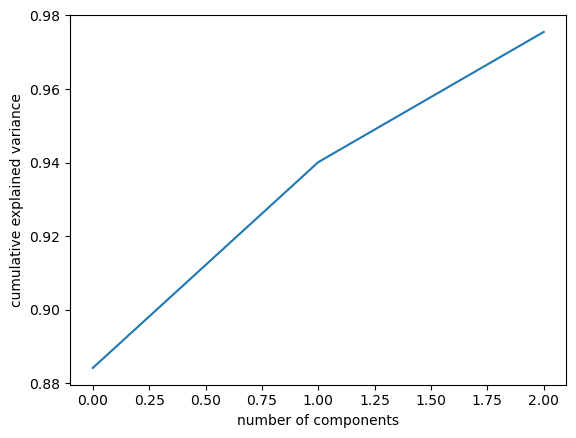

In [55]:
pca_3=PCA(n_components=3)
pca_3.fit(X_scaled)
plt.plot(np.cumsum(pca_3.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [56]:
X_pca=pca_3.transform(X_scaled)

### Train-Test Split

In [57]:
Y=df_denue_clean
Y_tiendita=df_denue_clean["tiendita"]
Y_ropa=df_denue_clean["ropa"]
Y_tecnologia=df_denue_clean["tecnologia"]
Y_restaurante=df_denue_clean["restaurante"]
Y_papeleria=df_denue_clean["papeleria"]
Y_gimnasio=df_denue_clean["gimnasio"]
Y_estetica=df_denue_clean["estetica"]

In [58]:
X_train, X_test, y_train_tiendita, y_test_tiendita = train_test_split(X_pca,Y_tiendita, test_size=0.3, random_state=100)
X_train, X_test, y_train_ropa, y_test_ropa = train_test_split(X_pca,Y_ropa, test_size=0.3, random_state=100)
X_train, X_test, y_train_tecnologia, y_test_tecnologia = train_test_split(X_pca,Y_tecnologia, test_size=0.3, random_state=100)
X_train, X_test, y_train_restaurante, y_test_restaurante = train_test_split(X_pca,Y_restaurante, test_size=0.3, random_state=100)
X_train, X_test, y_train_papeleria, y_test_papeleria = train_test_split(X_pca,Y_papeleria, test_size=0.3, random_state=100)
X_train, X_test, y_train_gimnasio, y_test_gimnasio = train_test_split(X_pca,Y_gimnasio, test_size=0.3, random_state=100)
X_train, X_test, y_train_estetica, y_test_estetica = train_test_split(X_pca,Y_estetica, test_size=0.3, random_state=100)

## Models

In [59]:
lr=LinearRegression(fit_intercept=True,normalize=False)
lasso=Lasso()
ridge=Ridge()
bay=BayesianRidge()

In [60]:
mse_tiendita = {"LinearReg":[],"LassoReg":[],"RidgeReg":[],"BayReg":[]}
mse_ropa = {"LinearReg":[],"LassoReg":[],"RidgeReg":[],"BayReg":[]}
mse_tecnologia = {"LinearReg":[],"LassoReg":[],"RidgeReg":[],"BayReg":[]}
mse_restaurante = {"LinearReg":[],"LassoReg":[],"RidgeReg":[],"BayReg":[]}
mse_papeleria = {"LinearReg":[],"LassoReg":[],"RidgeReg":[],"BayReg":[]}
mse_gimnasio = {"LinearReg":[],"LassoReg":[],"RidgeReg":[],"BayReg":[]}
mse_estetica = {"LinearReg":[],"LassoReg":[],"RidgeReg":[],"BayReg":[]}

mae_tiendita = {"LinearReg":[],"LassoReg":[],"RidgeReg":[],"BayReg":[]}
mae_ropa = {"LinearReg":[],"LassoReg":[],"RidgeReg":[],"BayReg":[]}
mae_tecnologia = {"LinearReg":[],"LassoReg":[],"RidgeReg":[],"BayReg":[]}
mae_restaurante = {"LinearReg":[],"LassoReg":[],"RidgeReg":[],"BayReg":[]}
mae_papeleria = {"LinearReg":[],"LassoReg":[],"RidgeReg":[],"BayReg":[]}
mae_gimnasio = {"LinearReg":[],"LassoReg":[],"RidgeReg":[],"BayReg":[]}
mae_estetica = {"LinearReg":[],"LassoReg":[],"RidgeReg":[],"BayReg":[]}

In [61]:
lr.fit(X_train,y_train_tiendita)
y_pred_tiendita=lr.predict(X_test)
mse_tiendita["LinearReg"].append(mean_squared_error(y_test_tiendita,y_pred_tiendita))
mae_tiendita["LinearReg"].append(mean_absolute_error(y_test_tiendita,y_pred_tiendita))

lasso.fit(X_train,y_train_tiendita)
y_pred_tiendita=lasso.predict(X_test)
mse_tiendita["LassoReg"].append(mean_squared_error(y_test_tiendita,y_pred_tiendita))
mae_tiendita["LassoReg"].append(mean_absolute_error(y_test_tiendita,y_pred_tiendita))

ridge.fit(X_train,y_train_tiendita)
y_pred_tiendita=ridge.predict(X_test)
mse_tiendita["RidgeReg"].append(mean_squared_error(y_test_tiendita,y_pred_tiendita))
mae_tiendita["RidgeReg"].append(mean_absolute_error(y_test_tiendita,y_pred_tiendita))

bay.fit(X_train,y_train_tiendita)
y_pred_tiendita=bay.predict(X_test)
mse_tiendita["BayReg"].append(mean_squared_error(y_test_tiendita,y_pred_tiendita))
mae_tiendita["BayReg"].append(mean_absolute_error(y_test_tiendita,y_pred_tiendita))

C:\ProgramData\Anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [62]:
lr.fit(X_train,y_train_ropa)
y_pred_ropa=lr.predict(X_test)
mse_ropa["LinearReg"].append(mean_squared_error(y_test_ropa,y_pred_ropa))
mae_ropa["LinearReg"].append(mean_absolute_error(y_test_ropa,y_pred_ropa))

lasso.fit(X_train,y_train_ropa)
y_pred_ropa=lasso.predict(X_test)
mse_ropa["LassoReg"].append(mean_squared_error(y_test_ropa,y_pred_ropa))
mae_ropa["LassoReg"].append(mean_absolute_error(y_test_ropa,y_pred_ropa))

ridge.fit(X_train,y_train_ropa)
y_pred_ropa=ridge.predict(X_test)
mse_ropa["RidgeReg"].append(mean_squared_error(y_test_ropa,y_pred_ropa))
mae_ropa["RidgeReg"].append(mean_absolute_error(y_test_ropa,y_pred_ropa))

bay.fit(X_train,y_train_ropa)
y_pred_ropa=bay.predict(X_test)
mse_ropa["BayReg"].append(mean_squared_error(y_test_ropa,y_pred_ropa))
mae_ropa["BayReg"].append(mean_absolute_error(y_test_ropa,y_pred_ropa))

C:\ProgramData\Anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [63]:
lr.fit(X_train,y_train_tecnologia)
y_pred_tecnologia=lr.predict(X_test)
mse_tecnologia["LinearReg"].append(mean_squared_error(y_test_ropa,y_pred_tecnologia))
mae_tecnologia["LinearReg"].append(mean_absolute_error(y_test_ropa,y_pred_tecnologia))

lasso.fit(X_train,y_train_tecnologia)
y_pred_tecnologia=lasso.predict(X_test)
mse_tecnologia["LassoReg"].append(mean_squared_error(y_test_tecnologia,y_pred_tecnologia))
mae_tecnologia["LassoReg"].append(mean_absolute_error(y_test_tecnologia,y_pred_tecnologia))

ridge.fit(X_train,y_train_tecnologia)
y_pred_tecnologia=ridge.predict(X_test)
mse_tecnologia["RidgeReg"].append(mean_squared_error(y_test_tecnologia,y_pred_tecnologia))
mae_tecnologia["RidgeReg"].append(mean_absolute_error(y_test_tecnologia,y_pred_tecnologia))

bay.fit(X_train,y_train_tecnologia)
y_pred_tecnologia=bay.predict(X_test)
mse_tecnologia["BayReg"].append(mean_squared_error(y_test_tecnologia,y_pred_tecnologia))
mae_tecnologia["BayReg"].append(mean_absolute_error(y_test_tecnologia,y_pred_tecnologia))

C:\ProgramData\Anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [64]:
lr.fit(X_train,y_train_restaurante)
y_pred_restaurante=lr.predict(X_test)
mse_restaurante["LinearReg"].append(mean_squared_error(y_test_restaurante,y_pred_restaurante))
mae_restaurante["LinearReg"].append(mean_absolute_error(y_test_restaurante,y_pred_restaurante))

lasso.fit(X_train,y_train_restaurante)
y_pred_restaurante=lasso.predict(X_test)
mse_restaurante["LassoReg"].append(mean_squared_error(y_test_restaurante,y_pred_restaurante))
mae_restaurante["LassoReg"].append(mean_absolute_error(y_test_restaurante,y_pred_restaurante))

ridge.fit(X_train,y_train_restaurante)
y_pred_restaurante=ridge.predict(X_test)
mse_restaurante["RidgeReg"].append(mean_squared_error(y_test_restaurante,y_pred_restaurante))
mae_restaurante["RidgeReg"].append(mean_absolute_error(y_test_restaurante,y_pred_restaurante))

bay.fit(X_train,y_train_restaurante)
y_pred_restaurante=bay.predict(X_test)
mse_restaurante["BayReg"].append(mean_squared_error(y_test_restaurante,y_pred_restaurante))
mae_restaurante["BayReg"].append(mean_absolute_error(y_test_restaurante,y_pred_restaurante))

C:\ProgramData\Anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [65]:
lr.fit(X_train,y_train_papeleria)
y_pred_papeleria=lr.predict(X_test)
mse_papeleria["LinearReg"].append(mean_squared_error(y_test_papeleria,y_pred_papeleria))
mae_papeleria["LinearReg"].append(mean_absolute_error(y_test_papeleria,y_pred_papeleria))

lasso.fit(X_train,y_train_papeleria)
y_pred_papeleria=lasso.predict(X_test)
mse_papeleria["LassoReg"].append(mean_squared_error(y_test_papeleria,y_pred_papeleria))
mae_papeleria["LassoReg"].append(mean_absolute_error(y_test_papeleria,y_pred_papeleria))

ridge.fit(X_train,y_train_papeleria)
y_pred_papeleria=ridge.predict(X_test)
mse_papeleria["RidgeReg"].append(mean_squared_error(y_test_papeleria,y_pred_papeleria))
mae_papeleria["RidgeReg"].append(mean_absolute_error(y_test_papeleria,y_pred_papeleria))

bay.fit(X_train,y_train_papeleria)
y_pred_papeleria=bay.predict(X_test)
mse_papeleria["BayReg"].append(mean_squared_error(y_test_papeleria,y_pred_papeleria))
mae_papeleria["BayReg"].append(mean_absolute_error(y_test_papeleria,y_pred_papeleria))

C:\ProgramData\Anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [66]:
lr.fit(X_train,y_train_gimnasio)
y_pred_gimnasio=lr.predict(X_test)
mse_gimnasio["LinearReg"].append(mean_squared_error(y_test_gimnasio,y_pred_gimnasio))
mae_gimnasio["LinearReg"].append(mean_absolute_error(y_test_gimnasio,y_pred_gimnasio))

lasso.fit(X_train,y_train_gimnasio)
y_pred_gimnasio=lasso.predict(X_test)
mse_gimnasio["LassoReg"].append(mean_squared_error(y_test_gimnasio,y_pred_gimnasio))
mae_gimnasio["LassoReg"].append(mean_absolute_error(y_test_gimnasio,y_pred_gimnasio))

ridge.fit(X_train,y_train_gimnasio)
y_pred_gimnasio=ridge.predict(X_test)
mse_gimnasio["RidgeReg"].append(mean_squared_error(y_test_gimnasio,y_pred_gimnasio))
mae_gimnasio["RidgeReg"].append(mean_absolute_error(y_test_gimnasio,y_pred_gimnasio))

bay.fit(X_train,y_train_gimnasio)
y_pred_gimnasio=bay.predict(X_test)
mse_gimnasio["BayReg"].append(mean_squared_error(y_test_gimnasio,y_pred_gimnasio))
mae_gimnasio["BayReg"].append(mean_absolute_error(y_test_gimnasio,y_pred_gimnasio))

C:\ProgramData\Anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [67]:
lr.fit(X_train,y_train_estetica)
y_pred_estetica=lr.predict(X_test)
mse_estetica["LinearReg"].append(mean_squared_error(y_test_estetica,y_pred_estetica))
mae_estetica["LinearReg"].append(mean_absolute_error(y_test_estetica,y_pred_estetica))

lasso.fit(X_train,y_train_estetica)
y_pred_estetica=lasso.predict(X_test)
mse_estetica["LassoReg"].append(mean_squared_error(y_test_estetica,y_pred_estetica))
mae_estetica["LassoReg"].append(mean_absolute_error(y_test_estetica,y_pred_estetica))

ridge.fit(X_train,y_train_estetica)
y_pred_estetica=ridge.predict(X_test)
mse_estetica["RidgeReg"].append(mean_squared_error(y_test_estetica,y_pred_estetica))
mae_estetica["RidgeReg"].append(mean_absolute_error(y_test_estetica,y_pred_estetica))

bay.fit(X_train,y_train_estetica)
y_pred_estetica=bay.predict(X_test)
mse_estetica["BayReg"].append(mean_squared_error(y_test_estetica,y_pred_estetica))
mae_estetica["BayReg"].append(mean_absolute_error(y_test_estetica,y_pred_estetica))

C:\ProgramData\Anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


## Metrics

### Mean Squared Error

In [68]:
mse_tiendita

{'LinearReg': [35657.61585345917],
 'LassoReg': [36912.58227441904],
 'RidgeReg': [37152.0359957146],
 'BayReg': [37684.88869134207]}

In [69]:
mse_ropa

{'LinearReg': [25052.732840966975],
 'LassoReg': [26363.792627370156],
 'RidgeReg': [25960.264373259553],
 'BayReg': [25643.595222735556]}

In [70]:
mse_tecnologia

{'LinearReg': [87170.93022130305],
 'LassoReg': [878.5592944242026],
 'RidgeReg': [658.4499042493185],
 'BayReg': [652.7107853290707]}

In [71]:
mse_restaurante

{'LinearReg': [1395.5642150109347],
 'LassoReg': [1787.0368450421902],
 'RidgeReg': [1588.0970995203156],
 'BayReg': [1439.317350665368]}

In [72]:
mse_papeleria

{'LinearReg': [1454.6984871132504],
 'LassoReg': [1545.3276193373777],
 'RidgeReg': [1492.015416055108],
 'BayReg': [1477.8466988618584]}

In [73]:
mse_gimnasio

{'LinearReg': [264.16333060738987],
 'LassoReg': [421.23477730753524],
 'RidgeReg': [301.2942321379171],
 'BayReg': [267.01465073402903]}

In [74]:
mse_estetica

{'LinearReg': [7285.710743154756],
 'LassoReg': [7527.819081037558],
 'RidgeReg': [8175.318319379366],
 'BayReg': [7327.386915792142]}

### Mean Absolute Error

In [75]:
mae_tiendita

{'LinearReg': [110.44512376624772],
 'LassoReg': [111.87159460482718],
 'RidgeReg': [112.0071773573649],
 'BayReg': [112.54357581753126]}

In [76]:
mae_ropa

{'LinearReg': [57.46285959040401],
 'LassoReg': [57.923206292240344],
 'RidgeReg': [57.67524694340095],
 'BayReg': [57.54301060765373]}

In [77]:
mae_tecnologia

{'LinearReg': [126.98485291015896],
 'LassoReg': [10.059657468353883],
 'RidgeReg': [9.169994155143872],
 'BayReg': [9.16445555611935]}

In [78]:
mae_restaurante

{'LinearReg': [19.212932075784966],
 'LassoReg': [21.189936761942633],
 'RidgeReg': [20.199525658495592],
 'BayReg': [19.44356557311098]}

In [79]:
mae_papeleria

{'LinearReg': [23.86921034632598],
 'LassoReg': [23.937361712086798],
 'RidgeReg': [23.894026372691343],
 'BayReg': [23.885502476486117]}

In [80]:
mae_gimnasio

{'LinearReg': [8.936605993757068],
 'LassoReg': [10.466624866839783],
 'RidgeReg': [9.381004010619353],
 'BayReg': [8.97260444456699]}

In [81]:
mae_estetica

{'LinearReg': [48.99451616437412],
 'LassoReg': [50.45332614371714],
 'RidgeReg': [53.215896987027335],
 'BayReg': [49.253786880745956]}